In [2]:
import torch
from torch.distributions import multinomial

In [2]:
fair_probs = torch.ones([6]) / 6
# 生成一个概率向量，这里设置各样本点的概率相同
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [5]:
"""
Multinomial根据传入的概率向量和要抽取的样本个数来进行选取样本
如下就是，根据传入的的概率向量抽取一个样本，被抽取到的样本在对应位置为1
"""
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [26]:
# 多次抽样后发现基本符合传入概率
p=multinomial.Multinomial(1000, fair_probs).sample()/1000
print(p)
print(torch.abs(p-fair_probs))

tensor([0.1590, 0.1570, 0.1830, 0.1670, 0.1550, 0.1790])
tensor([0.0077, 0.0097, 0.0163, 0.0003, 0.0117, 0.0123])


In [28]:
# 进⾏500组实验，每组抽取10个样本
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
counts

tensor([[1., 1., 1., 2., 3., 2.],
        [4., 1., 1., 1., 2., 1.],
        [0., 2., 0., 5., 2., 1.],
        ...,
        [1., 2., 2., 3., 0., 2.],
        [1., 3., 2., 3., 1., 0.],
        [2., 1., 1., 2., 0., 4.]])

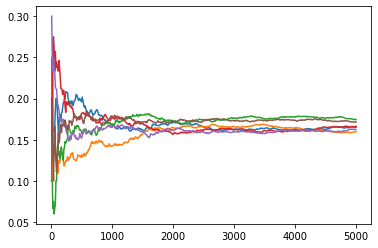

In [42]:
# 画出概率收敛图
from matplotlib import pyplot as plt
cum_counts=counts.cumsum(dim=0)
cum_counts_sum=cum_counts.sum(dim=1,keepdims=True)
estimates=cum_counts/cum_counts_sum
for i in range(estimates.size(1)):
    plt.plot(cum_counts_sum[:,0],estimates[:,i])
plt.show()

In [14]:
unfair=torch.exp(torch.arange(1,5))
unfair=unfair/(unfair.max()**2)
unfair

tensor([0.0009, 0.0025, 0.0067, 0.0183])

In [1]:
# 基本上只有位置2与位置3会被选中
multinomial.Multinomial(1, unfair).sample()

NameError: name 'multinomial' is not defined

In [8]:
# 正态分布
torch.normal(0,1,(10,))

tensor([-0.5052, -0.4768, -0.0046, -0.4850,  0.3611, -0.0015, -0.4655, -0.0407,
        -0.4586, -0.4118])